## https://www.kaggle.com/code/raulcsimpetru/vgg16-binary-classification#4.-Model-

In [2]:
import keras
import os
import cv2
import numpy as np
from keras.applications.vgg16 import VGG16


import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from keras import models
from keras import optimizers

In [44]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 15

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1.25],
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'train',
        target_size=(224, 224),  # all images will be resized to 240x240
        batch_size=batch_size,
        class_mode='binary')  # more than two classes

Found 970 images belonging to 2 classes.


In [60]:
vgg16_weight_path = "imagenet"
conv_base = VGG16(weights=vgg16_weight_path,
                  include_top=False,
                  input_shape=(224, 224, 3))

In [61]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='sigmoid')) # sigmoid used for binary classification

model.layers[0].trainable = False

In [64]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
# model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid')) # sigmoid used for binary classification
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dropout(0.3))
# model.add(layers.Dense(2, activation='softmax'))
model.layers[0].trainable = False


In [65]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['acc'])

In [66]:
ep = 25
steps = 50  ##train_generator.n//(ep*batch_size)
## validation_steps = len(X_test)//batch_size

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=6
)

In [67]:
history = model.fit( # 10 epochs
    train_generator,
    steps_per_epoch=steps,
    epochs=ep,
    callbacks=[early_stopping])

Epoch 1/25
15/50 ━━━━━━━━━━━━━━━━━━━━ 1:04 2s/step - acc: 0.4431 - loss: 10.8576

C:\Users\Crost\AppData\Roaming\Python\Python313\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - acc: 0.6094 - loss: 7.8846
Epoch 2/25


C:\Users\Crost\AppData\Roaming\Python\Python313\site-packages\keras\src\callbacks\early_stopping.py:99: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: acc,loss
  current = self.get_monitor_value(logs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 587ms/step - acc: 0.6800 - loss: 6.3277
Epoch 3/25


C:\Users\Crost\AppData\Roaming\Python\Python313\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


50/50 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - acc: 0.7396 - loss: 5.6210
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 26s 490ms/step - acc: 0.6622 - loss: 6.8512
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - acc: 0.7530 - loss: 5.2552
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 482ms/step - acc: 0.7644 - loss: 4.5703
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - acc: 0.7879 - loss: 5.4074
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 518ms/step - acc: 0.7156 - loss: 7.3702
Epoch 9/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - acc: 0.7640 - loss: 5.9225
Epoch 10/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 558ms/step - acc: 0.7409 - loss: 6.8521
Epoch 11/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - acc: 0.7747 - loss: 6.2176
Epoch 12/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 561ms/step - acc: 0.7682 - loss: 6.2452
Epoch 13/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - acc: 0.8148 - loss: 4.9964
Epoch 14/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 584ms/step - acc: 0.8222 - loss: 6.4720
Epoch 15/25
50/50 ━━━━━━━━━━━━━━━━━━━━

In [69]:
model.save("model.keras")

In [3]:
model = load_model("trained_models/model.keras")

C:\Users\Crost\AppData\Roaming\Python\Python313\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [36]:
def read_imgs(path, img_size):
    set_new = []
    for value in os.listdir(path):
        for img in os.listdir(path + value):
            img = cv2.imread(path + value + "/" + img)
            img = cv2.resize(
                img,
                dsize=img_size,
                interpolation=cv2.INTER_CUBIC
            )
            set_new.append(img)
    
    return np.array(set_new)

def preprocess_imgs(path, img_size):
    set_new = []
    for value in os.listdir(path):
        for img in os.listdir(path + value):
            img = cv2.imread(path + value + "/" + img)
            img = cv2.resize(
                img,
                dsize=img_size,
                interpolation=cv2.INTER_CUBIC
            )
            set_new.append(tf.keras.applications.vgg16.preprocess_input(img))
    
    return np.array(set_new)

Test_Path = "test/"
test_data = preprocess_imgs(Test_Path, img_size=(224,224))

reality = []
for value in os.listdir(Test_Path):
    for img in os.listdir(Test_Path + value):
        reality.append(1) if value.lower() == "ia" else reality.append(0)
        
predictions = model.predict(test_data)
labels = [0 if x > 0.5 else 1 for x in predictions]

accuracy = accuracy_score(reality, labels)
print("Test Accuracy:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Test Accuracy: 0.9230769230769231


In [37]:
path = "test/"
imgs = preprocess_imgs(Test_Path, img_size=(224,224))
og_imgs = read_imgs(Test_Path, img_size=(224,224))

In [38]:
pred = model.predict(imgs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [39]:
lab = ["Real" if x > 0.5 else "IA" for x in pred]

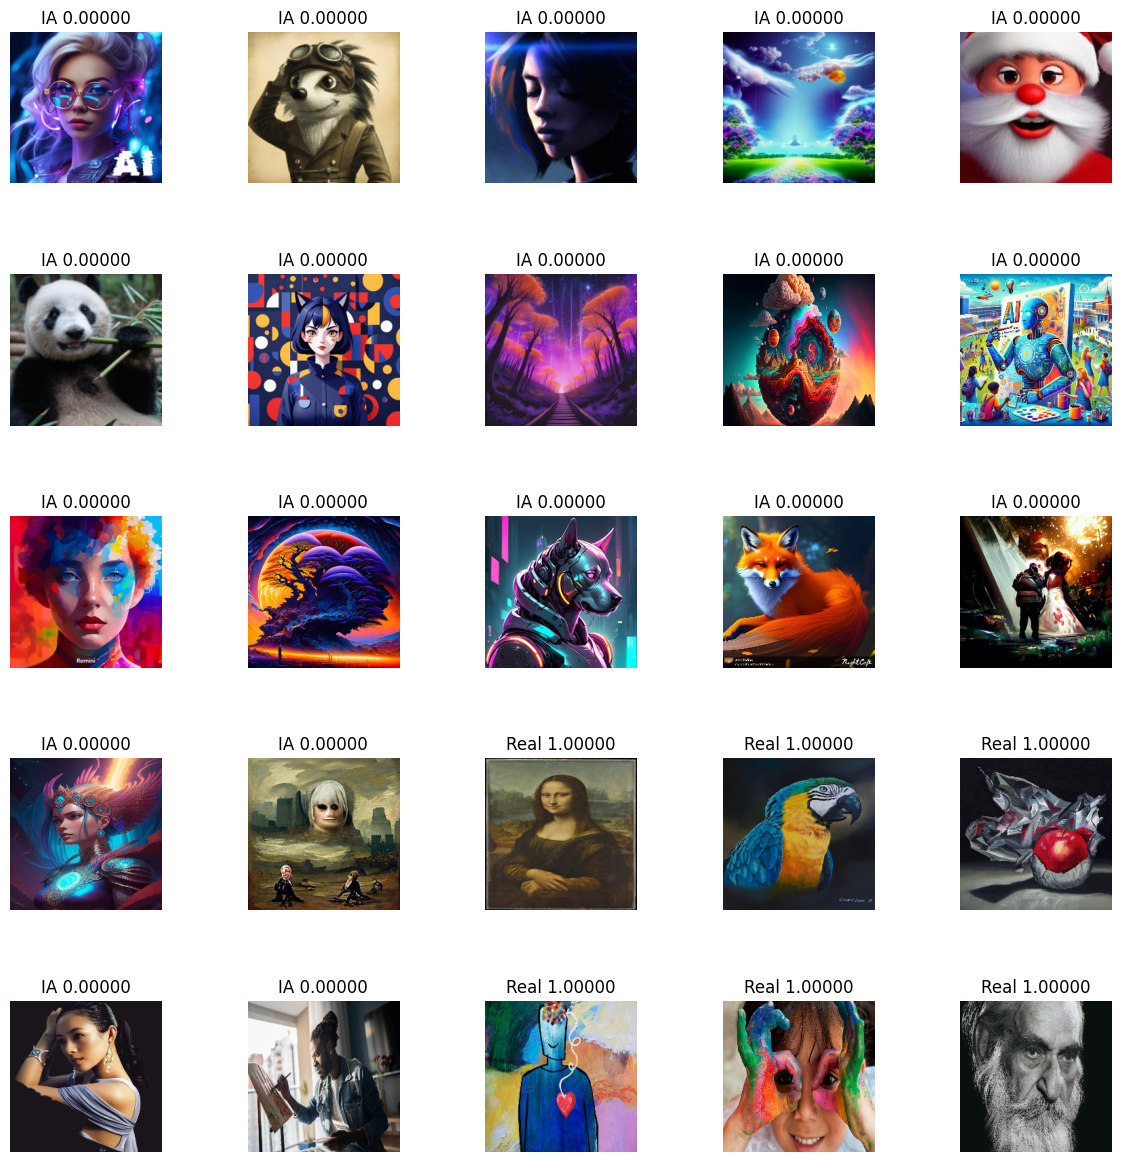

In [42]:

grid = int(np.round(len(imgs) ** 0.5))

fig, axs = plt.subplots(grid, grid)
fig.set_figheight(14)
fig.set_figwidth(14)
for i in range(len(axs)):
    for j in range(len(axs)):
        if(i + j * len(axs) >= len(imgs)):
            break    
        num = pred[i + j * len(axs)][0]

        
        title = lab[i + j * len(axs)] + " " + "{0:.5f}".format(num)
        axs[j, i].set_title(title)
    
        axs[j, i].axis("off")
        im = og_imgs[i + j * len(axs)]
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

        axs[j, i].imshow(im, vmin=0, vmax=1)
        plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.6)
        


In [ ]:
pred = model.predict(imgs)

#IA es 1, 0 es real
print("Real" if pred > 0.5 else "IA")

TypeError: TensorFlowTrainer.predict() missing 1 required positional argument: 'x'